In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_csv('cust_satisfaction.csv')
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      103904 non-null  object 
 1   Customer Type               103904 non-null  object 
 2   Type of Travel              103904 non-null  object 
 3   Class                       103904 non-null  object 
 4   satisfaction                103904 non-null  object 
 5   Age                         103904 non-null  int64  
 6   Flight Distance             103904 non-null  int64  
 7   Inflight entertainment      103904 non-null  int64  
 8   Baggage handling            103904 non-null  int64  
 9   Cleanliness                 103904 non-null  int64  
 10  Departure Delay in Minutes  103904 non-null  int64  
 11  Arrival Delay in Minutes    103594 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 9.5+ MB


In [6]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)


In [7]:
df.isnull().sum()
df.dropna(inplace=True)

In [8]:
df["Customer Type"].value_counts()

Customer Type
Loyal Customer       84517
disloyal Customer    18905
Name: count, dtype: int64

In [9]:
loyal_customers = df[df["Customer Type"] == "Loyal Customer"]
disloyal_customers = df[df["Customer Type"] == "disloyal Customer"]

In [10]:
loyal_customers=loyal_customers.sample(20000)
loyal_customers.shape

(20000, 12)

In [11]:
balanced_df = pd.concat([loyal_customers, disloyal_customers], axis=0)
balanced_df.shape

(38905, 12)

In [12]:
cat_col= balanced_df.select_dtypes(include=['object'])
cat_col

,Gender,Customer Type,Type of Travel,Class,satisfaction
73374,Female,Loyal Customer,Business travel,Business,satisfied
22422,Female,Loyal Customer,Business travel,Business,satisfied
63163,Male,Loyal Customer,Business travel,Eco,neutral or dissatisfied
102398,Female,Loyal Customer,Business travel,Business,satisfied
67,Male,Loyal Customer,Business travel,Business,satisfied
...,...,...,...,...,...
103892,Female,disloyal Customer,Business travel,Business,neutral or dissatisfied
103895,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied


In [13]:
num_col= balanced_df.select_dtypes(exclude=['object'])
num_col

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
73374,54,2093,5,5,4,0,0.0
22422,50,1096,4,4,5,29,2.0
63163,36,862,5,4,5,0,0.0
102398,59,1587,4,4,5,1,0.0
67,46,1532,5,5,4,0,0.0
...,...,...,...,...,...,...,...
103892,37,596,3,3,3,110,121.0
103895,24,1055,1,5,1,13,10.0
103899,23,192,2,4,2,3,0.0
103901,30,1995,4,4,4,7,14.0


In [14]:
cat_col

,Gender,Customer Type,Type of Travel,Class,satisfaction
73374,Female,Loyal Customer,Business travel,Business,satisfied
22422,Female,Loyal Customer,Business travel,Business,satisfied
63163,Male,Loyal Customer,Business travel,Eco,neutral or dissatisfied
102398,Female,Loyal Customer,Business travel,Business,satisfied
67,Male,Loyal Customer,Business travel,Business,satisfied
...,...,...,...,...,...
103892,Female,disloyal Customer,Business travel,Business,neutral or dissatisfied
103895,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied


In [15]:
## one hot encoding
cat_col = pd.get_dummies(cat_col, drop_first=True).astype(int)           # drop_first=True avoids dummy variable trap
cat_col

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
73374,0,0,0,0,0,1
22422,0,0,0,0,0,1
63163,1,0,0,1,0,0
102398,0,0,0,0,0,1
67,1,0,0,0,0,1
...,...,...,...,...,...,...
103892,0,1,0,0,0,0
103895,0,1,0,1,0,0
103899,0,1,0,1,0,0
103901,1,1,0,0,0,0


In [16]:
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder
ohe= OneHotEncoder(drop="if_binary")
cat_col_encoded = ohe.fit_transform(cat_col).toarray()
cat_col_encoded

array([[0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0.],
       ...,
       [0., 1., 0., 1., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0.]], shape=(38905, 6))

In [17]:
column_name=list(ohe.get_feature_names_out())
column_name

['Gender_Male_1',
 'Customer Type_disloyal Customer_1',
 'Type of Travel_Personal Travel_1',
 'Class_Eco_1',
 'Class_Eco Plus_1',
 'satisfaction_satisfied_1']

In [18]:
one_hot = pd.DataFrame(cat_col_encoded,columns=column_name)
one_hot.head()

,Gender_Male_1,Customer Type_disloyal Customer_1,Type of Travel_Personal Travel_1,Class_Eco_1,Class_Eco Plus_1,satisfaction_satisfied_1
0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0


In [19]:
one_hot= one_hot.reset_index(drop=True)
num_col= num_col.reset_index(drop=True)
# final_df=pd.concat([one_hot,num_col],axis=1)
# final_df.head()

In [20]:
final_df=pd.concat([num_col,one_hot],axis=1)
final_df.head()

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male_1,Customer Type_disloyal Customer_1,Type of Travel_Personal Travel_1,Class_Eco_1,Class_Eco Plus_1,satisfaction_satisfied_1
0,54,2093,5,5,4,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,50,1096,4,4,5,29,2.0,0.0,0.0,0.0,0.0,0.0,1.0
2,36,862,5,4,5,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,59,1587,4,4,5,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,46,1532,5,5,4,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [21]:
## x and y --> train test split ---> algo traning

In [22]:
matrix = final_df.corr()
matrix       

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male_1,Customer Type_disloyal Customer_1,Type of Travel_Personal Travel_1,Class_Eco_1,Class_Eco Plus_1,satisfaction_satisfied_1
Age,1.000000,0.142558,0.074195,-0.056665,0.054316,-0.013377,-0.014784,0.017998,-0.377882,0.072968,-0.182366,0.021738,0.120885
Flight Distance,0.142558,1.000000,0.122015,0.048661,0.089807,-0.003255,-0.007498,0.006740,-0.333237,-0.129119,-0.340971,-0.081371,0.279089
Inflight entertainment,0.074195,0.122015,1.000000,0.240997,0.800634,-0.015194,-0.018116,0.010546,-0.135697,-0.067158,-0.124548,-0.022307,0.280009
Baggage handling,-0.056665,0.048661,0.240997,1.000000,0.060879,-0.012162,-0.016120,0.027200,0.033322,-0.024758,-0.204423,-0.071584,0.225283
Cleanliness,0.054316,0.089807,0.800634,0.060879,1.000000,0.000638,-0.000729,0.011181,-0.103190,-0.028807,-0.083198,-0.022475,0.212703
Departure Delay in Minutes,-0.013377,-0.003255,-0.015194,-0.012162,0.000638,1.000000,0.964656,0.006575,0.004483,-0.007593,0.011678,0.006281,-0.040215
Arrival Delay in Minutes,-0.014784,-0.007498,-0.018116,-0.016120,-0.000729,0.964656,1.000000,0.002709,0.004907,-0.005967,0.016714,0.007546,-0.048954
Gender_Male_1,0.017998,0.006740,0.010546,0.027200,0.011181,0.006575,0.002709,1.000000,-0.041187,0.014585,-0.005325,-0.037663,0.026493
Customer Type_disloyal Customer_1,-0.377882,-0.333237,-0.135697,0.033322,-0.103190,0.004483,0.004907,-0.041187,1.000000,-0.464883,0.148955,-0.085312,-0.248326
Type of Travel_Personal Travel_1,0.072968,-0.129119,-0.067158,-0.024758,-0.028807,-0.007593,-0.005967,0.014585,-0.464883,1.000000,0.330545,0.100161,-0.267049


<Axes: >

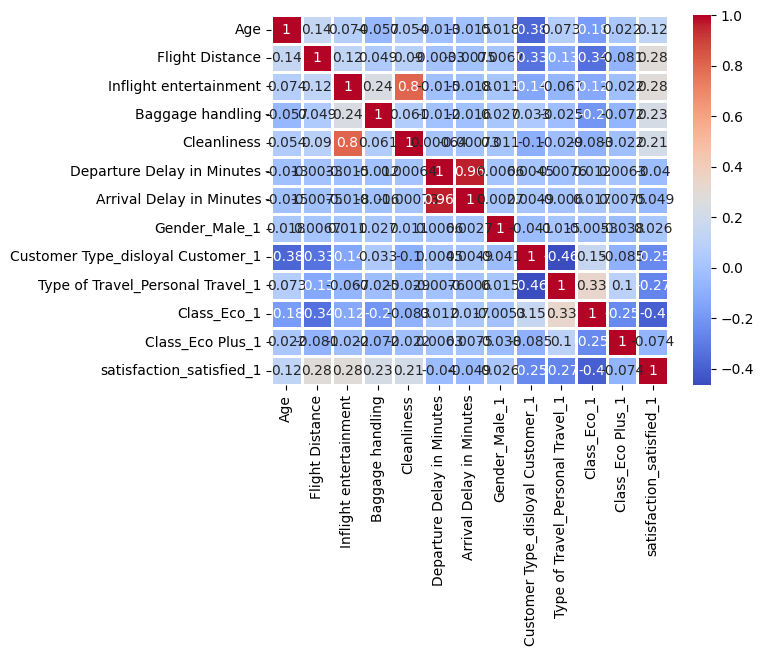

In [23]:
sns.heatmap(matrix,annot=True,cmap='coolwarm',linewidths=1)

In [24]:
## divide the data into x and y or independent and dependent variable
x = final_df.drop("satisfaction_satisfied_1",axis=1)
y= final_df["satisfaction_satisfied_1"]

In [25]:
## trainning and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,
                                                test_size=0.2,
                                               random_state=42) 

In [26]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)  # fit the model with traning data

C:\Users\Akshat\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [27]:
lr.score(x_train,y_train)  # score the model with traning data

0.7684423595938825

In [28]:
lr.score(x_test,y_test)

0.7648117208585015

In [29]:
# model evaluation
y_pred=lr.predict(x_test)  # predict the values using testing data
y_pred

array([0., 0., 1., ..., 0., 0., 1.], shape=(7781,))

In [30]:
## making a dataframe 
df1=pd.DataFrame({"Actual":y_test,"Predicted":y_pred})  # create a dataframe with actual and predicted values
df1.head(5)  # show the first 20 rows of the dataframe

,Actual,Predicted
18536,0.0,0.0
36240,0.0,0.0
5426,0.0,1.0
21679,1.0,0.0
18714,0.0,0.0


In [31]:
from sklearn .metrics import log_loss
print("Log loss:",log_loss(y_test,y_pred))

Log loss: 8.477044814559106


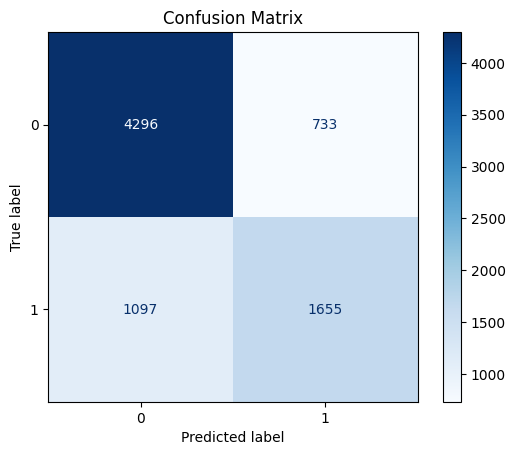

In [32]:
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay

y_pred = lr.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

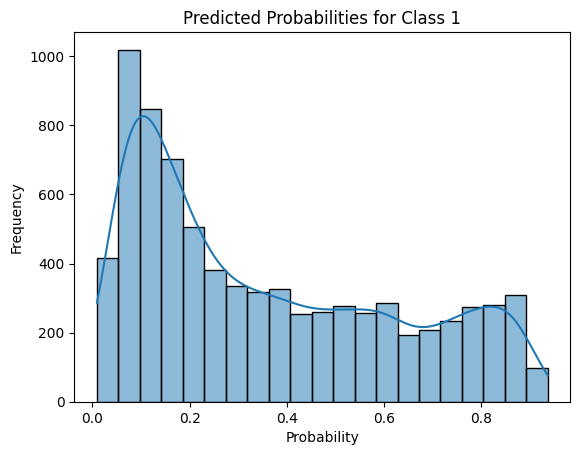

In [34]:
 #Get predicted probabilities for class 1
y_probs = lr.predict_proba(x_test)[:, 1]

sns.histplot(y_probs, kde=True)
plt.title("Predicted Probabilities for Class 1")
plt.xlabel("Probability")
plt.ylabel("Frequency")
plt.show()


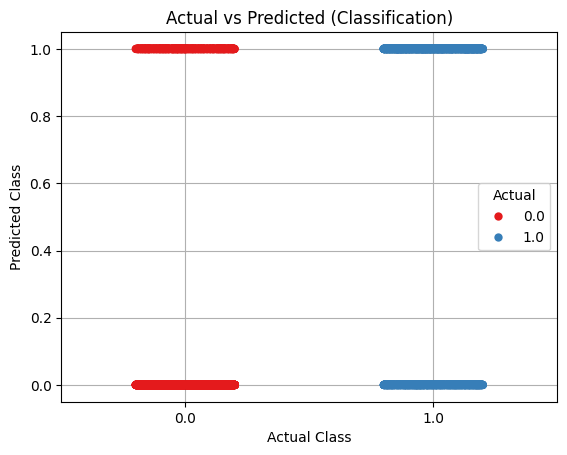

In [ ]:
sns.stripplot(x=y_test, y=y_pred, hue=y_test, jitter=0.2, palette="Set1", size=6)
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.title("Actual vs Predicted (Classification)")
plt.legend(title='Actual')
plt.grid(True)
plt.show()
